In [1]:
!pip install pip install mdptoolbox-hiive

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00
  Created wheel for mdptoolbox-hiive: filename=mdptoolbox_hiive-4.0.3.1-py3-none-any.whl size=35121 sha256=a15c1d3f65c17e340cf86525483afca83a79f7cbc9ae99c91d44d729a384a863
  Stored in directory: /root/.cache/pip/wheels/3c/21/00/79fb3890bf11432b069070b7623416cd8b9f8501580692a52f
Successfully built mdptoolbox-hiive


The forest management problem is a classic example in the field of Markov Decision Processes (MDPs) and reinforcement learning. In this problem, a forest owner must decide whether to harvest timber or preserve the forest for future growth over a finite time horizon. The decisions made by the forest owner influence both immediate rewards (such as timber revenue) and long-term consequences (such as future timber yields).

Here's a breakdown of the key components of the forest management problem:

State Space: The state of the system represents the current state of the forest, usually characterized by the age or size of the trees.

Action Space: At each time step, the forest owner can choose to either harvest timber (action H) or preserve the forest (action W).

Transition Probabilities: The transition probabilities define the likelihood of transitioning from one state to another based on the chosen action. For example, harvesting timber may lead to a decrease in the forest's age, while preserving the forest maintains or increases its age.

Immediate Rewards: The immediate rewards associated with each action depend on the state of the forest and the chosen action. Harvesting timber yields immediate revenue, while preserving the forest may incur costs or provide benefits in the future.

Discount Factor: The discount factor accounts for the time preference of the forest owner, balancing immediate rewards against future benefits. A discount factor of 0.9 indicates a preference for sooner rewards over later rewards.

Time Horizon: The finite time horizon specifies the number of time steps or periods over which decisions are made. In the given example, the time horizon is set to 3 periods.

hyper parameters in selecting policy values:

In summary, num_episodes controls the number of samples collected within each reset, while num_resets controls the number of independent samples across different starting states and event sequences. Both parameters are important for obtaining an accurate and reliable evaluation of the policy's performance.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [7]:
#Forest Example
#Policy Iteration
from hiive.mdptoolbox import mdp
import hiive.mdptoolbox.example as example


#P, R = example.forest(S = 10)
#pi = mdp.PolicyIteration(P, R, 0.9)
#pi.run()
#print(pi.policy)
#print(pi.V)

In [67]:
def run_policy(policy, S, R, p, epsilon, gamma, num_episodes, num_resets):
  """
  This function executes the policy and returns the reward for each episode.

  Args:
      epsilon: The epsilon value for the epsilon-greedy policy.
      gammas: The list of gamma values to evaluate.
      num_episodes: The number of episodes to run for each gamma.
      num_resets: The number of times to reset the environment for each gamma.

  Returns:
      A dictionary where the keys are the gamma values and the values are lists of rewards for each episode.
  """

  rew_arr = []
  for y in range(num_resets):
    forest_state = 0
    total_rew = 0
    for x in range(num_episodes):
      forest_state = min(forest_state, S - 1)
      if np.random.rand(1) <= p:
        forest_state = -1
      else:
        total_rew += R[forest_state][policy[forest_state]]
        if policy[forest_state] == 1:
          forest_state -= 1
      forest_state +=1
    rew_arr.append(total_rew)

    rewards_averages = np.mean(np.array(rew_arr))


  return (np.array(rew_arr))

In [64]:
#Policy Runs
import random
import numpy as np

#Run Forest with 10, 100, 1000 Size Experiments
def run_forest(size):

  #Define Random Seed
  np.random.seed(42)
  random.seed(42)

  num_episodes = 10000
  num_resets = 100

  print("Running Forest: Size of ", size)

  #Define MDP Problem
  S = size
  r1 = 10
  r2 = 50
  p = 0.1
  P, R = example.forest(S=S, r1=r1, r2=r2, p=p)

  epsilons = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
  gammas = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999]

  best_reward = -1
  best_gamma = -1
  best_epsilon = -1
  best_policy = None


  #Calculate Statistics
  mean_vals_all = []
  iterations_all = []
  optimal_policies = []


  for e in epsilons:
    for g in gammas:
      pi = mdp.PolicyIteration(P, R, gamma=g)
      pi.run()
      rewards_averages = run_policy(pi.policy, S, R, p, e, gammas, num_episodes, num_resets)
      if best_reward < rewards_averages:
        best_reward = rewards_averages
        best_gamma = g
        best_epsilon = e
        best_policy = pi.policy


      mean_vals = [i["Mean V"] for i in pi.run_stats]
      mean_vals_all.append(mean_vals)
      iterations_all.append(range(1, len(mean_vals) + 1))
      optimal_policies.append(pi.policy)


  print("Best Reward: ", best_reward)
  print("Best Gamma: ", best_gamma)
  print("Best Epsilon: ", best_epsilon)
  print("Best Policy: ", best_policy)


  mean_val = [i["Mean V"] for i in pi.run_stats]
  error = [i["Error"] for i in pi.run_stats]
  reward = [i["Reward"] for i in pi.run_stats]
  time = [i["Time"] for i in pi.run_stats]

  plt.figure(figsize=(10, 6))
  for mean_vals, iterations in zip(mean_vals_all, iterations_all):
      plt.plot(iterations, mean_vals, marker='', linestyle='-')

  plt.xlabel('Iterations')
  plt.ylabel('Mean Value')
  plt.title('Mean Value vs Iterations')
  plt.legend(['Epsilon: {}, Gamma: {}'.format(e, g) for e, g in zip(epsilons, gammas)], loc='best')
  plt.grid(True)
  plt.show()

  # Plotting Reward over Time
  plt.figure(figsize=(10, 6))
  plt.plot(reward, marker='', linestyle='-')
  plt.xlabel('Iterations')
  plt.ylabel('Cumulative Reward')
  plt.title('Cumulative Reward over Iterations')
  plt.grid(True)
  plt.show()

  # Plotting Error Convergence
  plt.figure(figsize=(10, 6))
  plt.plot(error, marker='', linestyle='-')
  plt.xlabel('Iterations')
  plt.ylabel('Error')
  plt.title('Error Convergence over Iterations')
  plt.grid(True)
  plt.show()

  # Plotting Time Taken for Policy Iteration
  plt.figure(figsize=(10, 6))
  plt.plot(time, marker='', linestyle='-')
  plt.xlabel('Iterations')
  plt.ylabel('Time (seconds)')
  plt.title('Time Taken for Policy Iteration over Iterations')
  plt.grid(True)
  plt.show()

  # Plotting Policy Improvement Steps
  #policy_improvement_steps = [len(pi.run_stats) for pi in optimal_policies]
  plt.figure(figsize=(10, 6))
  plt.plot(optimal_policies, marker='', linestyle='-')
  plt.xlabel('Iterations')
  plt.ylabel('Policy Improvement Steps')
  plt.title('Policy Improvement Steps over Iterations')
  plt.grid(True)
  plt.show()





In [69]:
#Running Forest: Size of  100, Best Reward:  813.48, Best Gamma:  0.99, Best Epsilon:  10


S = 100
r1 = 10
r2 = 50
p = 0.1
P, R = example.forest(S=S, r1=r1, r2=r2, p=p)
g = 0.99
e = 10

pi = mdp.PolicyIteration(P, R, gamma=g)
pi.run()
rewards_averages = run_policy(pi.policy, S, R, p, e, g, 10000, 100)
print(rewards_averages[-1])
reward = np.cumsum(rewards_averages)[-1]
print(reward)

8025.0
809717.0


In [10]:
#S = 10 , best gamma 0.8 , best epsilon 0.0001

S = 100
r1 = 10
r2 = 50
p = 0.1
P, R = example.forest(S=S, r1=r1, r2=r2, p=p)
g = 0.8
e = 0.0001

pi = mdp.PolicyIteration(P, R, gamma=g)
pi.run()
rewards_averages = run_policy(pi.policy, S, R, p, e, g, 10000, 100)
print(rewards_averages[-1])

mean_vals = [i["Mean V"] for i in pi.run_stats]
iterations = range(1, len(mean_vals) + 1)

#plt.figure(figsize=(10, 6))
#plt.plot(iterations, mean_vals, marker='', linestyle='-')

#plt.xlabel('Iterations')
#plt.ylabel('Mean Value')
#plt.title('Mean Value vs Iterations for Size: {}, Best Gamma: {}, Best Epsilon: {}'.format(S, g, e))
#plt.grid(True)
#plt.show()


8114.0


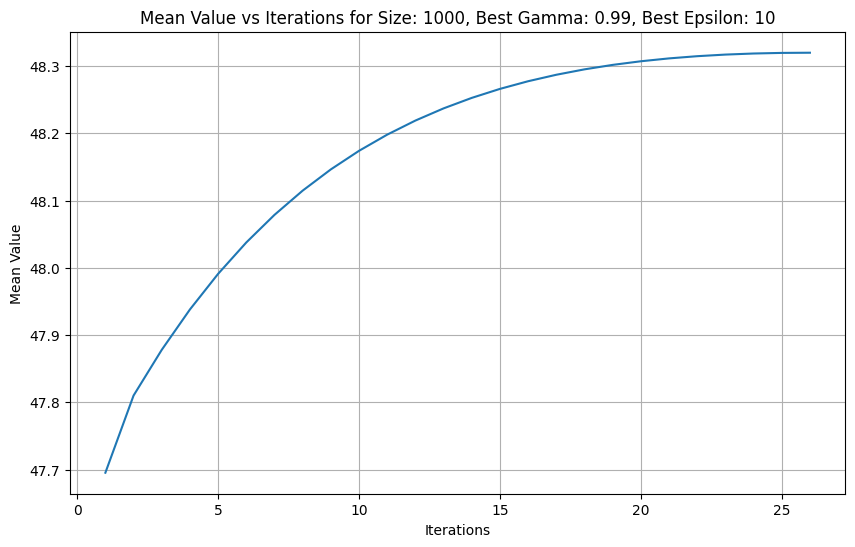

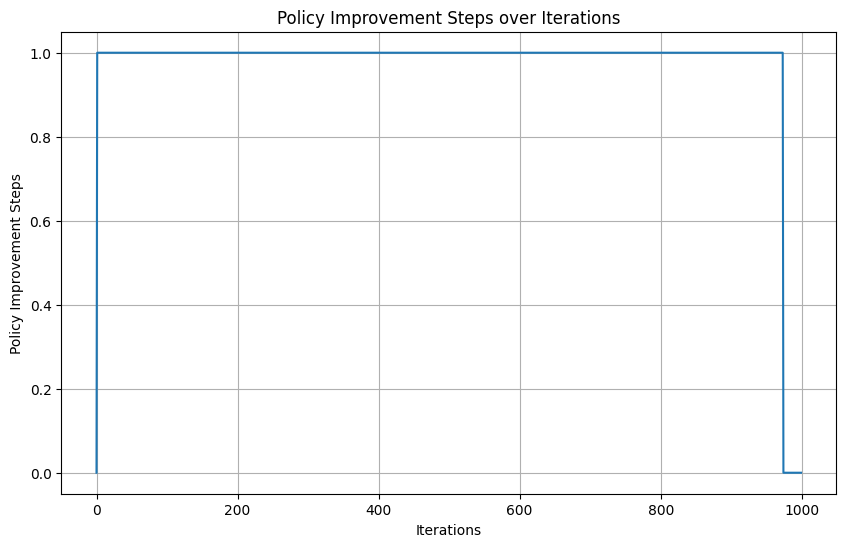

In [33]:
#Running Forest: Size of  1000, Best Reward:  813.48, Best Gamma:  0.99, Best Epsilon:  10
S = 1000
r1 = 10
r2 = 50
p = 0.1
P, R = example.forest(S=S, r1=r1, r2=r2, p=p)
g = 0.99
e = 10

pi = mdp.PolicyIteration(P, R, gamma=g)
pi.run()
#rewards_averages = run_policy(pi.policy, S, R, p, e, g, 1000, 100)

mean_vals = [i["Mean V"] for i in pi.run_stats]
iterations = range(1, len(mean_vals) + 1)

plt.figure(figsize=(10, 6))
plt.plot(iterations, mean_vals, marker='', linestyle='-')

plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title('Mean Value vs Iterations for Size: {}, Best Gamma: {}, Best Epsilon: {}'.format(S, g, e))
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(pi.policy, marker='', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Policy Improvement Steps')
plt.title('Policy Improvement Steps over Iterations')
plt.grid(True)
plt.show()


0.0


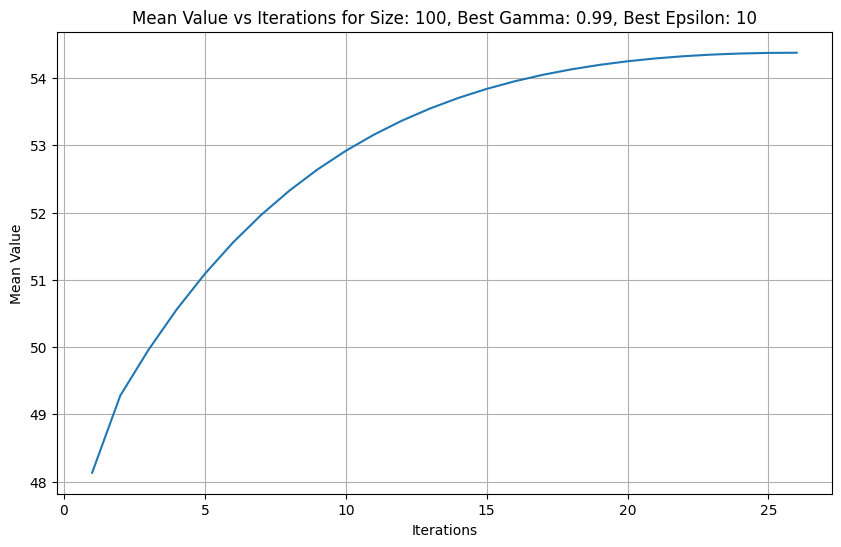

In [59]:
#Running Forest: Size of  100, Best Reward:  813.48, Best Gamma:  0.99, Best Epsilon:  10


S = 100
r1 = 10
r2 = 50
p = 0.1
P, R = example.forest(S=S, r1=r1, r2=r2, p=p)
g = 0.99
e = 10

pi = mdp.PolicyIteration(P, R, gamma=g)
pi.run()
rewards_averages = run_policy(pi.policy, S, R, p, e, g, 10000, 100)
print(rewards_averages[-1])

mean_vals = [i["Mean V"] for i in pi.run_stats]
iterations = range(1, len(mean_vals) + 1)

plt.figure(figsize=(10, 6))
plt.plot(iterations, mean_vals, marker='', linestyle='-')

plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title('Mean Value vs Iterations for Size: {}, Best Gamma: {}, Best Epsilon: {}'.format(S, g, e))
plt.grid(True)
plt.show()



Running Forest: Size of  10
Best Reward:  17644.5
Best Gamma:  0.8
Best Epsilon:  0.0001
Best Policy:  (0, 0, 0, 0, 0, 0, 0, 0, 0, 1)


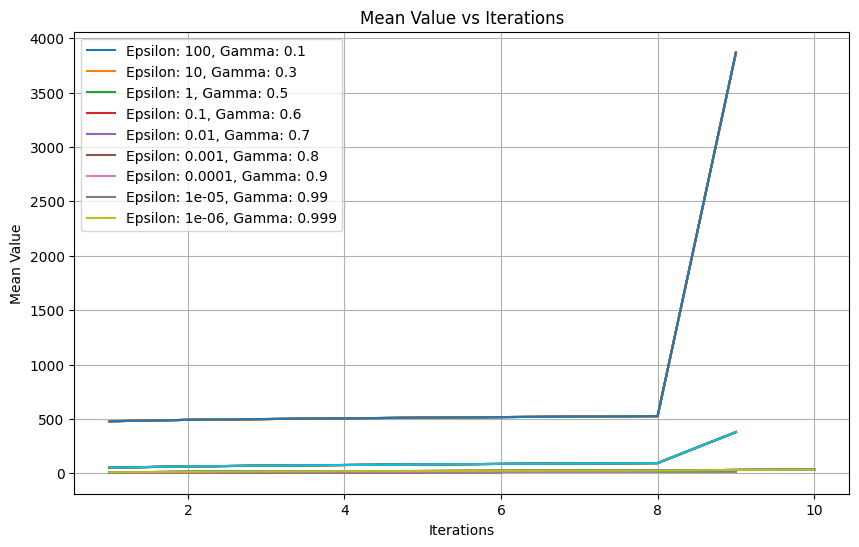

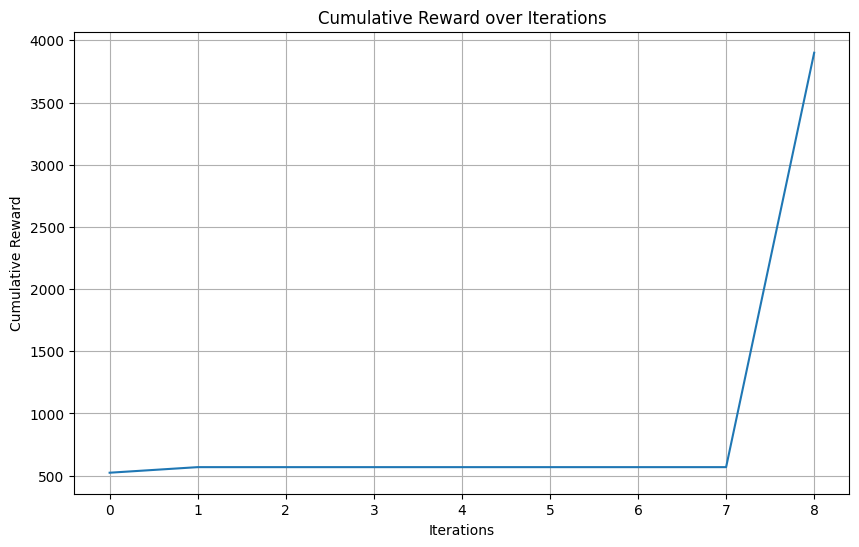

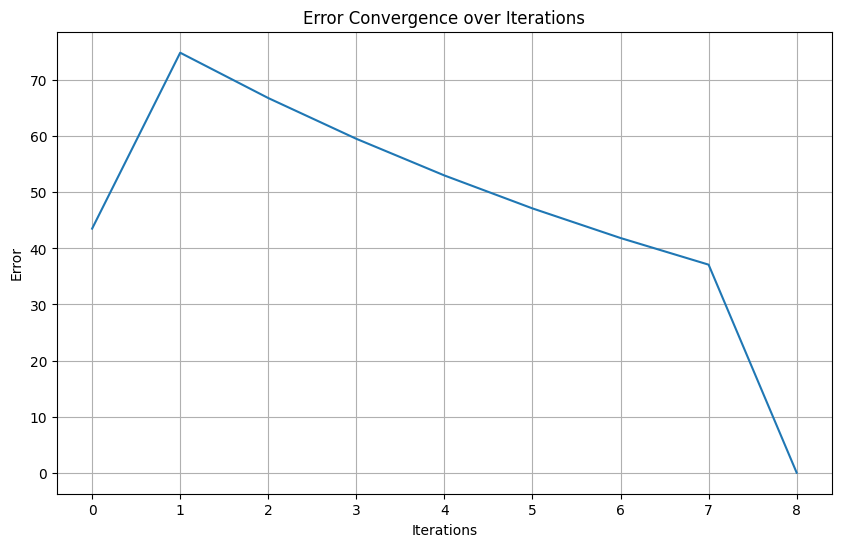

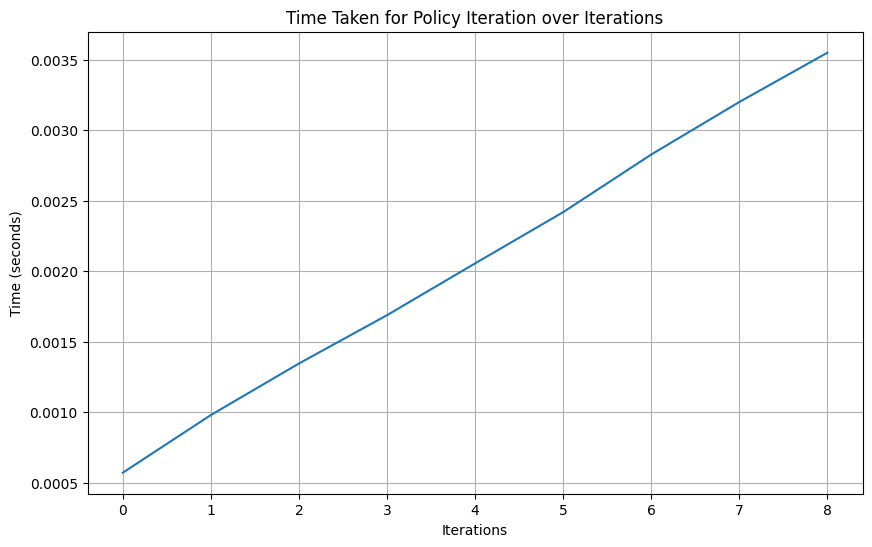

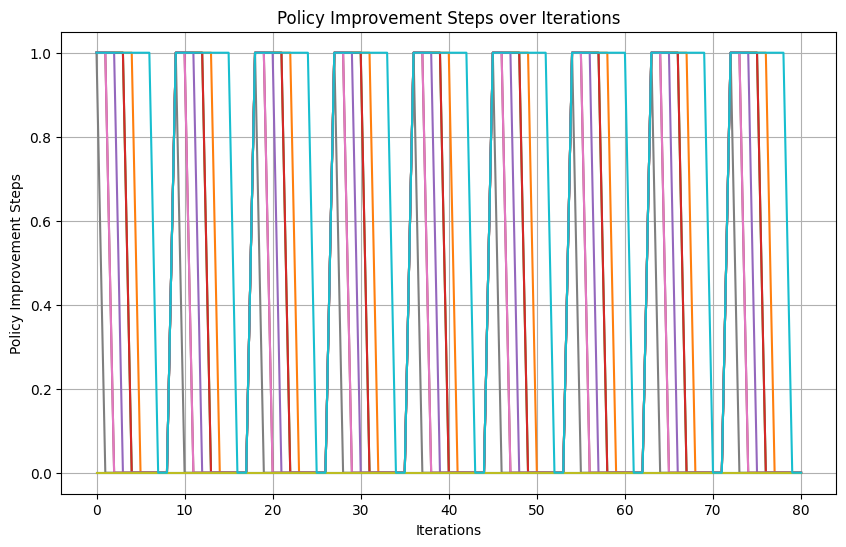

In [6]:
#Running Policy Experiment

run_forest(size=10)

#run_forest(size=100)
#run_forest(size=1000)

Running Forest: Size of  100
Best Reward:  813.48
Best Gamma:  0.99
Best Epsilon:  10
Best Policy:  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


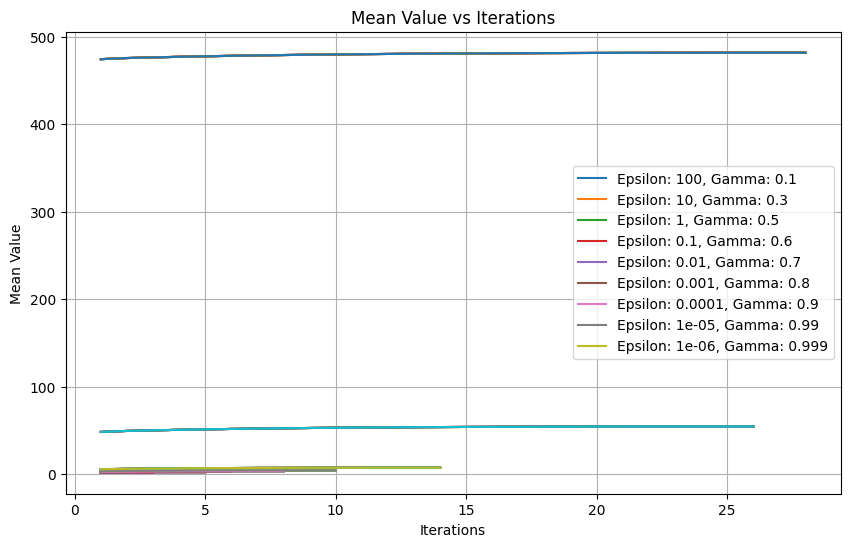

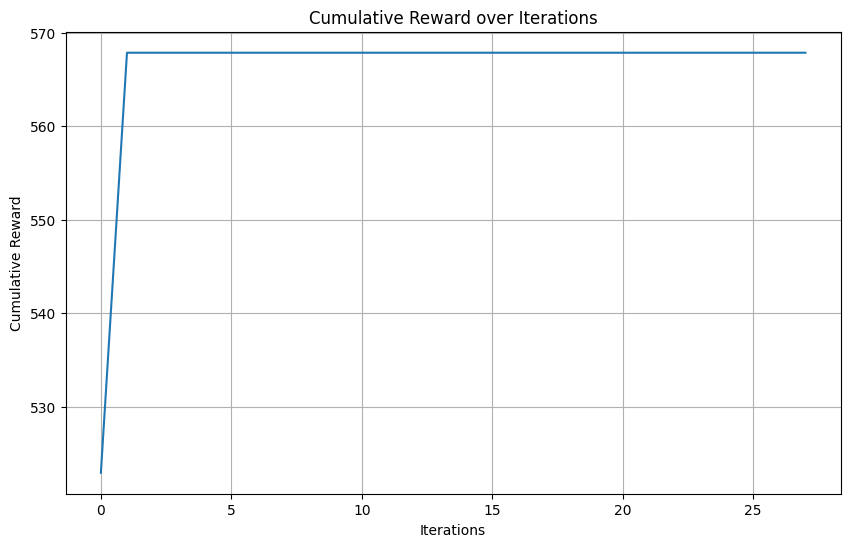

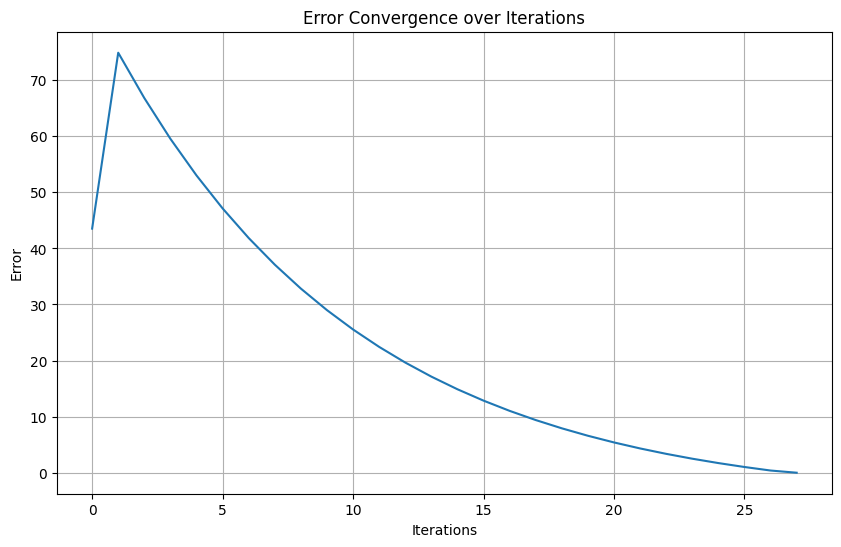

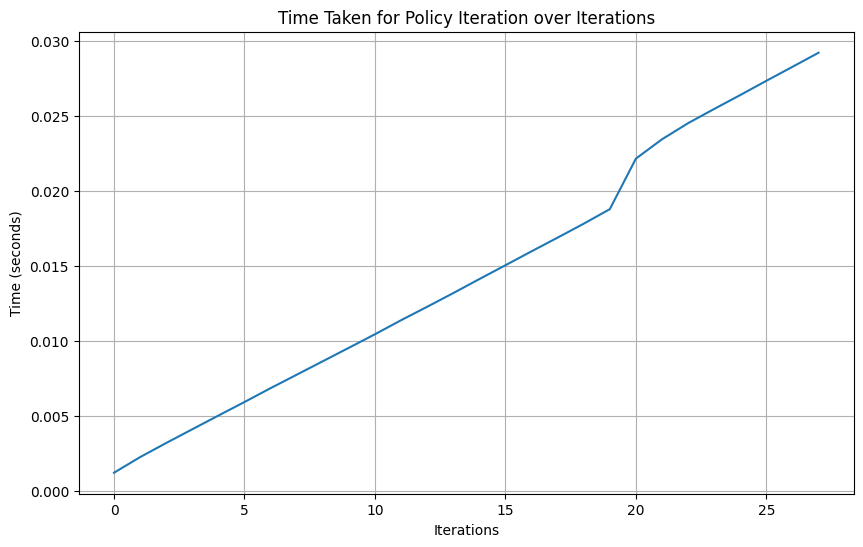

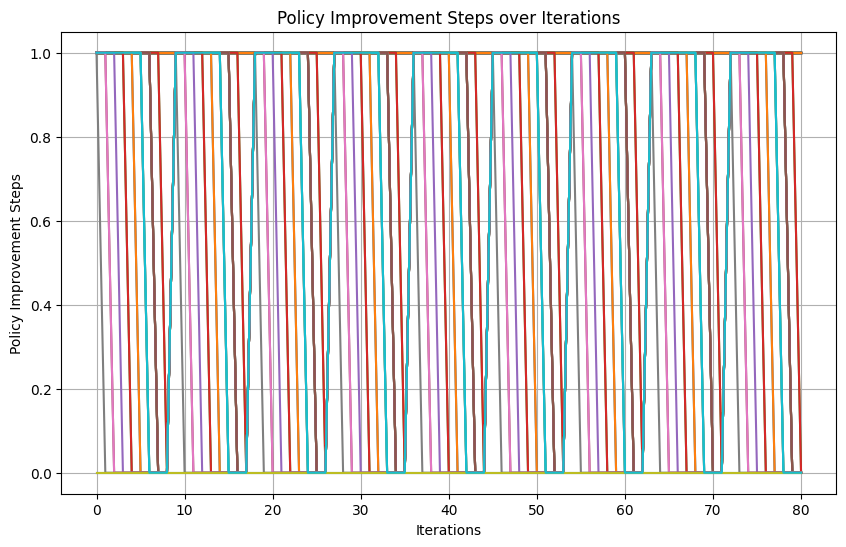

In [7]:
run_forest(size=100)


Running Forest: Size of  1000
Best Reward:  813.48
Best Gamma:  0.99
Best Epsilon:  10
Best Policy:  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

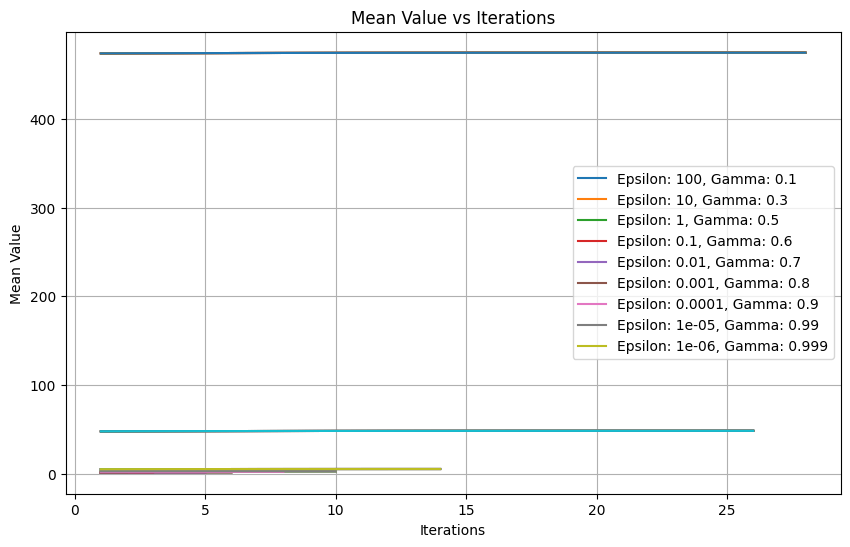

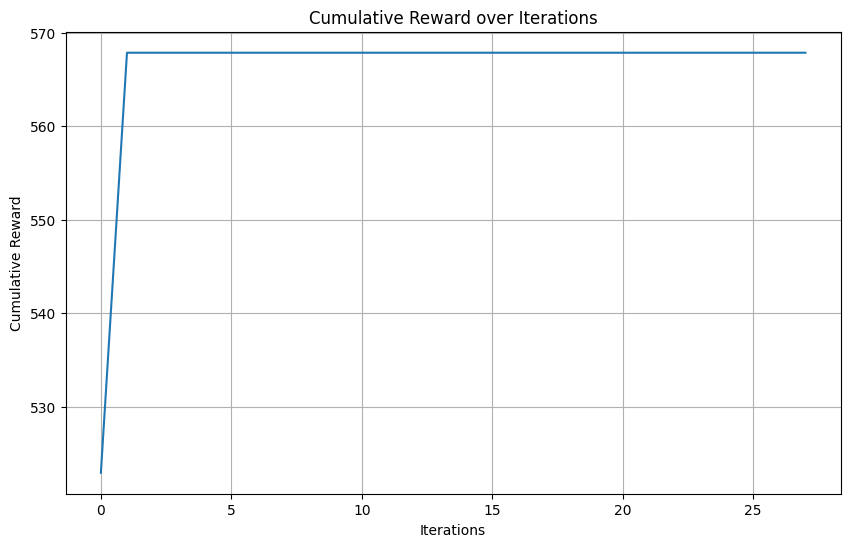

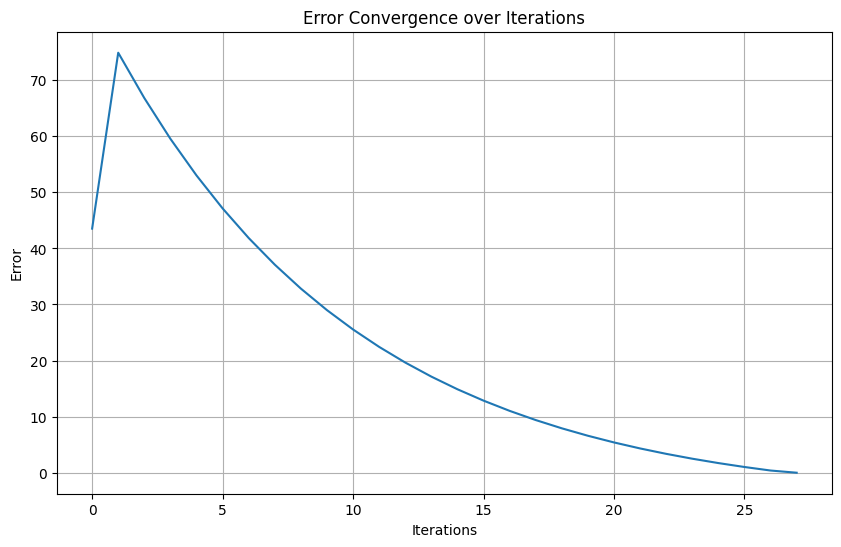

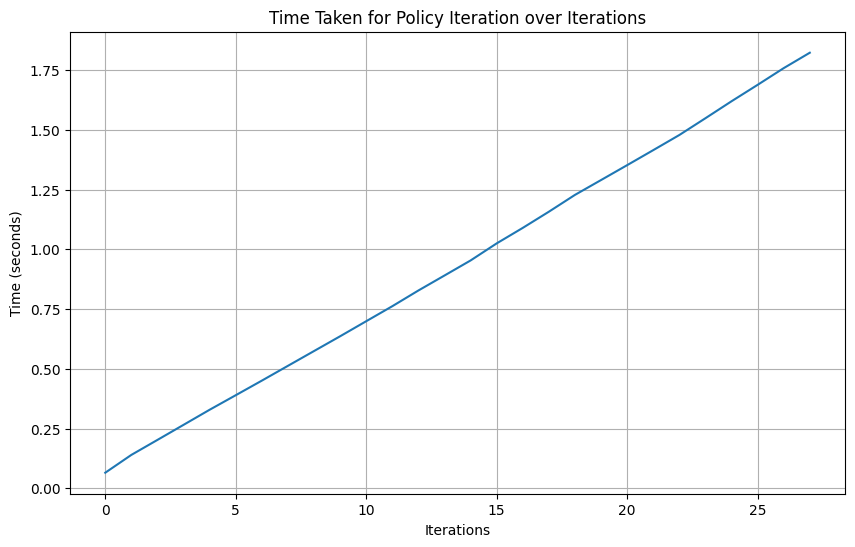

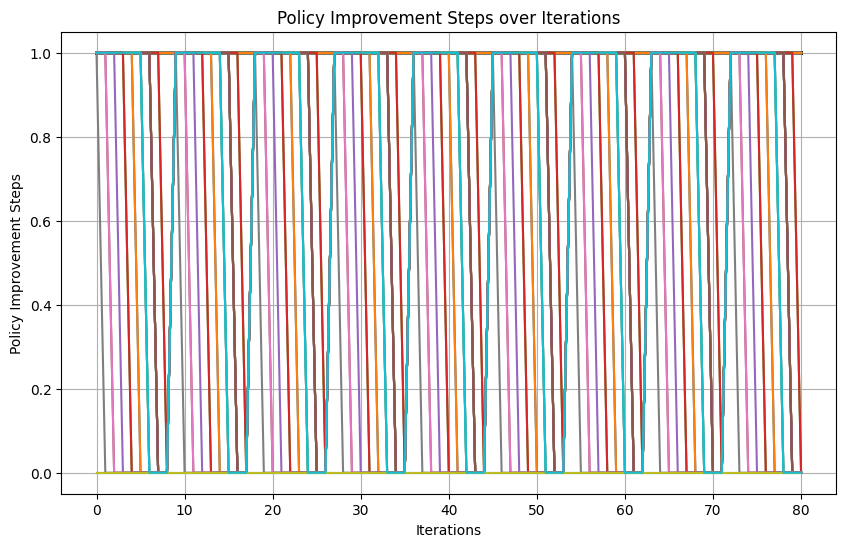

In [8]:
run_forest(size=1000)

OTHER CONTINUED BELOW

In [9]:
 #Value Iteration

 P, R = example.forest()
 vi = mdp.ValueIteration(P, R, 0.96)
 vi.verbose
 vi.run()
 print(vi.policy)
 print(vi.V)
 print(vi.iter)
 print(vi.time)

(0, 0, 0)
(5.93215488, 9.38815488, 13.38815488)
4
0.00044274330139160156


## Value Iteration

In [51]:
def run_value_policy(policy, S, R, p, epsilon, gamma, num_episodes, num_resets):
    rewards_all = []

    for _ in range(num_resets):
        total_rewards = 0
        for _ in range(num_episodes):
            forest_state = 0
            episode_reward = 0
            for _ in range(S):  # Simulate until reaching the final state
                if np.random.rand(1) <= p:  # With probability p, a forest fire occurs
                    forest_state = -1
                else:
                    episode_reward += R[forest_state][policy[forest_state]]
                    forest_state += 1 if policy[forest_state] == 0 else -1
            total_rewards += episode_reward
            print(episode_reward)
        rewards_all.append(total_rewards)

    return np.mean(rewards_all)


In [52]:
#Run Forest with 10, 100, 1000 Size Experiments
def run_value_iteration_forest(size):

    #Define Random Seed
    np.random.seed(42)
    random.seed(42)

    num_episodes = 10000
    num_resets = 1

    #Define MDP Problem
    S = size
    r1 = 10
    r2 = 50
    p = 0.1
    P, R = example.forest(S=S, r1=r1, r2=r2, p=p)

    epsilons = [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
    gammas = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999]

    gammas = [0.1]
    epsilons = [10]


    best_reward = -1
    best_gamma = -1
    best_epsilon = -1
    best_policy = None

    # Calculate Statistics
    mean_vals_all = []
    iterations_all = []
    optimal_values = []

    for e in epsilons:
        for g in gammas:
            vi = mdp.ValueIteration(P, R, g, e)
            vi.run()
            optimal_values.append(vi.V)

            rewards_averages = run_value_policy(vi.policy, S, R, p, e, g, num_episodes, num_resets)
            print(rewards_averages)
            if best_reward < rewards_averages:
                best_reward = rewards_averages
                best_gamma = g
                best_epsilon = e
                best_policy = vi.policy



    print("Best Reward: ", best_reward)
    print("Best Gamma: ", best_gamma)
    print("Best Epsilon: ", best_epsilon)
    print("Best Policy: ", best_policy)

    iterations = [i["Iteration"] for i in vi.run_stats]
    mean_val = [i["Mean V"] for i in vi.run_stats]
    error = [i["Error"] for i in vi.run_stats]
    rewards = [i["Reward"] for i in vi.run_stats]
    print(rewards[-1])
    print(rewards)


    #fig, ax = plt.subplots()
    #ax.plot(mean_val, label='Mean V')
    #ax.plot(error, label='Error')
    #ax.plot(rewards, label='Reward')
    #ax.legend()
    #plt.xlabel('Iterations', fontsize=15)
    #plt.ylabel('V/Error/Reward', fontsize=15)
    #plt.title('Mean V/Error/ Reward vs iterations for S: {}'.format(S))

    #plt.show()


    # Plotting Reward over Time
    #plt.figure(figsize=(10, 6))
    #plt.plot(rewards, marker='', linestyle='-')
    #plt.xlabel('Iterations')
    #plt.ylabel('Cumulative Reward')
    #plt.title('Cumulative Reward over Iterations')
    #plt.grid(True)
    #plt.show()

    # Plotting Error Convergence
    #plt.figure(figsize=(10, 6))
    #plt.plot(error, marker='', linestyle='-')
    #plt.xlabel('Iterations')
    #plt.ylabel('Error')
    #plt.title('Error Convergence over Iterations')
    #plt.grid(True)
    #plt.show()


In [53]:
run_value_iteration_forest(100)

Streaming output truncated to the last 5000 lines.
378.0
676.0
571.0
626.0
566.0
339.0
273.0
433.0
578.0
477.0
670.0
669.0
674.0
524.0
481.0
562.0
416.0
480.0
674.0
962.0
382.0
668.0
576.0
622.0
434.0
434.0
621.0
816.0
472.0
386.0
676.0
468.0
480.0
470.0
291.0
618.0
383.0
337.0
525.0
575.0
436.0
434.0
771.0
771.0
573.0
524.0
577.0
435.0
623.0
721.0
480.0
525.0
722.0
528.0
814.0
332.0
481.0
570.0
531.0
627.0
520.0
578.0
576.0
576.0
288.0
614.0
422.0
528.0
721.0
388.0
435.0
770.0
672.0
661.0
327.0
578.0
671.0
420.0
576.0
339.0
278.0
721.0
435.0
577.0
723.0
380.0
671.0
529.0
435.0
426.0
527.0
723.0
381.0
186.0
483.0
432.0
576.0
523.0
578.0
578.0
1054.0
416.0
768.0
472.0
665.0
624.0
332.0
481.0
483.0
722.0
333.0
524.0
461.0
477.0
333.0
719.0
625.0
671.0
339.0
620.0
575.0
425.0
573.0
435.0
429.0
471.0
483.0
674.0
417.0
526.0
674.0
626.0
480.0
624.0
674.0
381.0
371.0
386.0
621.0
529.0
573.0
676.0
383.0
430.0
378.0
426.0
475.0
577.0
189.0
477.0
425.0
579.0
386.0
362.0
387.0
324.0
386.0
574.0


Best Reward:  0.0
Best Gamma:  0.1
Best Epsilon:  10
Best Policy:  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1)
85.55181220083891


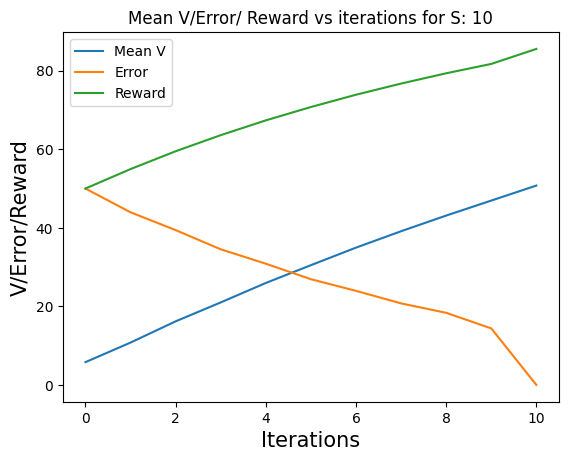

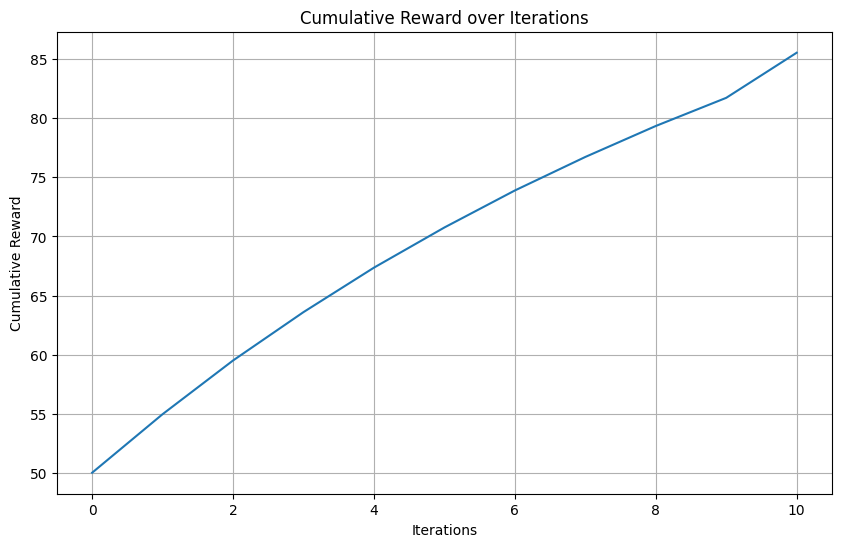

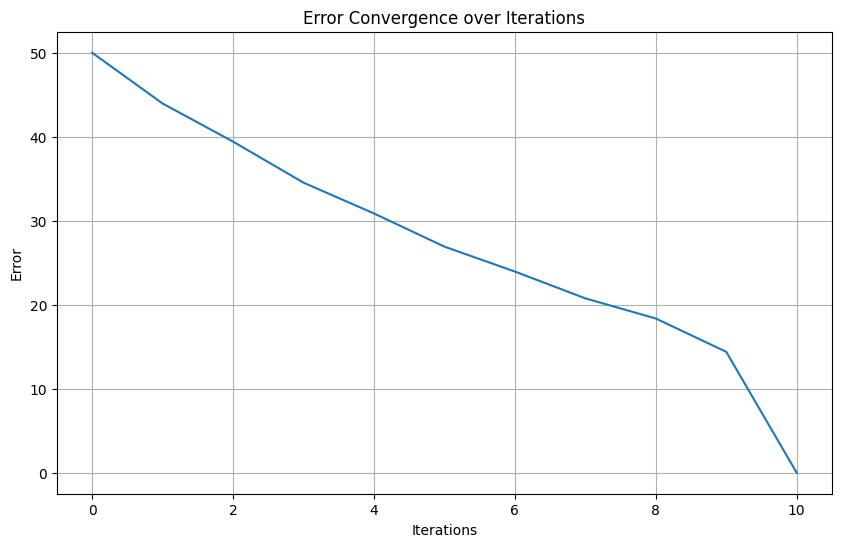

In [63]:
run_value_iteration_forest(10)

Best Reward:  0.0
Best Gamma:  0.1
Best Epsilon:  10
Best Policy:  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
184.69753323695215
[50.0, 54.955, 59.499860590000004, 63.595117773460004, 67.35873639818138, 70.75881461640554, 73.89071303699023, 76.72864290795478, 79.34969200499106, 81.73301328525591, 83.94092311658675, 85.95656923879714, 87.8303270968998, 89.54857373616983, 91.15203178857664, 92.6296888077821, 94.01446427675116, 95.29745603385231, 96.50527564596027, 97.63072686492681, 98.69532205913119, 99.69324400797166, 100.64188298544067, 101.53653655016505, 102.39126275396157, 103.20226032141659, 103.98089359970943, 104.724089798519, 105.44103572571227, 106.12924748416181, 106.79615160056618, 107.43974022757978, 108.06601691420943, 

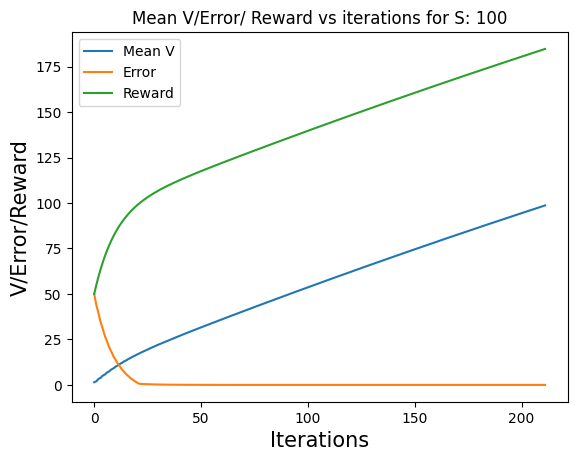

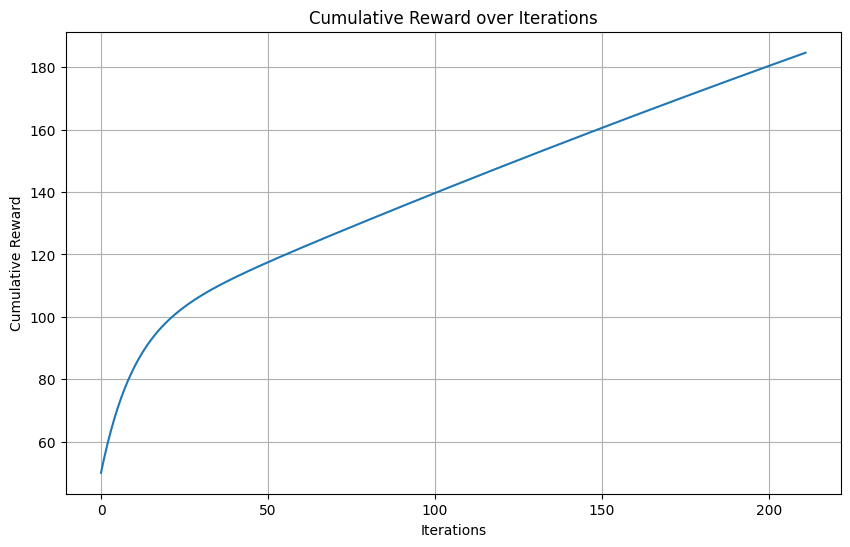

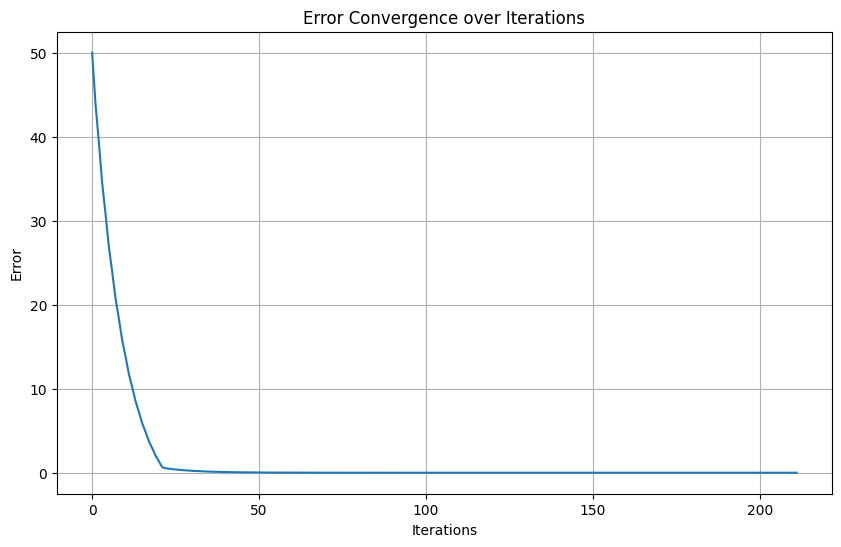

In [68]:
run_value_iteration_forest(100)

Best Reward:  0.0
Best Gamma:  0.1
Best Epsilon:  10
Best Policy:  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

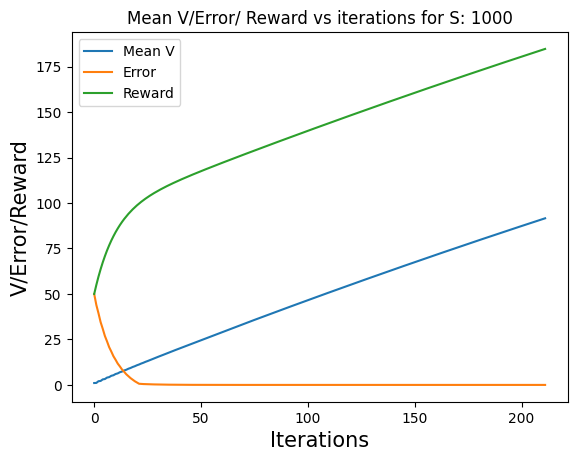

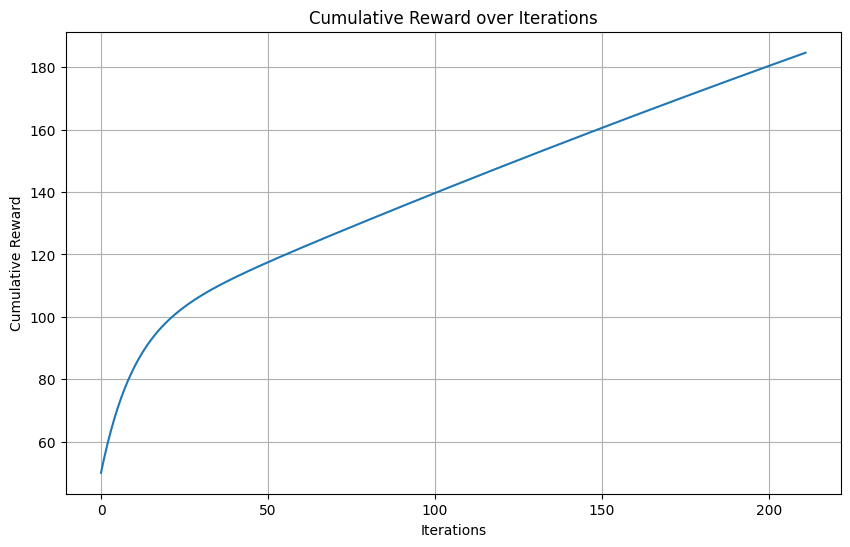

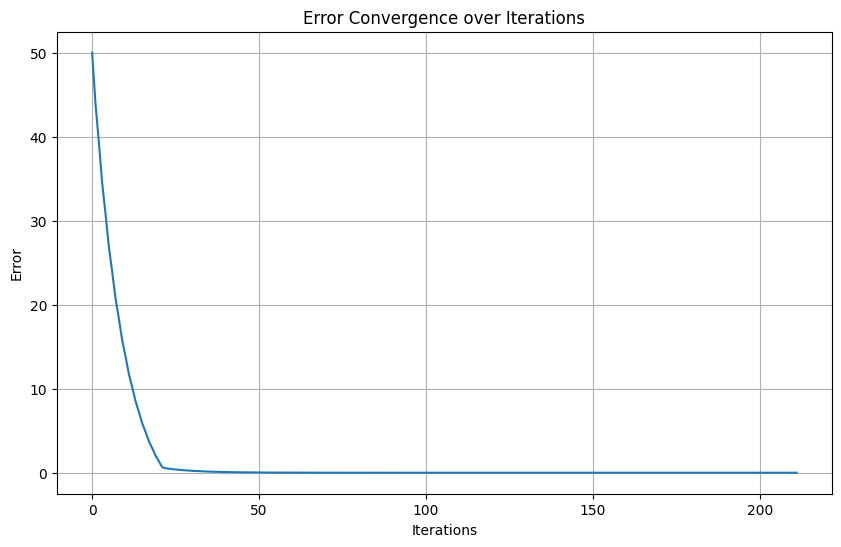

In [65]:
run_value_iteration_forest(1000)

In [69]:
run_value_iteration_forest(10000)

KeyboardInterrupt: 